In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [13]:
df=pd.read_csv("multiple_regression.csv")
df.columns = df.columns.str.strip().str.lower()

print(df)
# print(df.columns.tolist())


   area  bedrooms  age   price
0  2600         3   10  550000
1  3000         4   15  565000
2  3200         4    5  610000
3  3600         3    7  595000
4  4000         5    5  760000
5  4100         4    8  725000
6  4200         4   10  720000
7  4400         5   12  800000
8  4600         5   10  850000
9  4800         6    8  900000


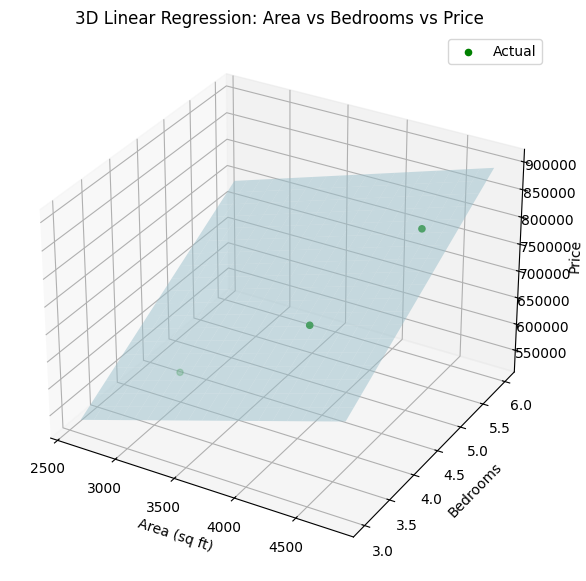

In [14]:
# Select features (independent variables)
x = df[["area", "bedrooms", "age"]]
y = df["price"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# 3D visualization (using area, bedrooms, price)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual data points
ax.scatter(x_test["area"], x_test["bedrooms"], y_test, color="green", label="Actual")

# Create a surface for predicted values
x_surf, y_surf = np.meshgrid(
    np.linspace(x["area"].min(), x["area"].max(), 20),
    np.linspace(x["bedrooms"].min(), x["bedrooms"].max(), 20)
)

# Keep age constant (average)
age_mean = df["age"].mean()

# Compute predicted price surface
z_surf = (model.intercept_ +
          model.coef_[0]*x_surf +
          model.coef_[1]*y_surf +
          model.coef_[2]*age_mean)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='lightblue', alpha=0.5)

ax.set_xlabel("Area (sq ft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("3D Linear Regression: Area vs Bedrooms vs Price")

ax.legend()
plt.show()

Coefficients: [328.8972262  -37.87652986]
Intercept: 153.54713404502874
MSE: 5283.298727139004
R² Score: 0.02130464579269109


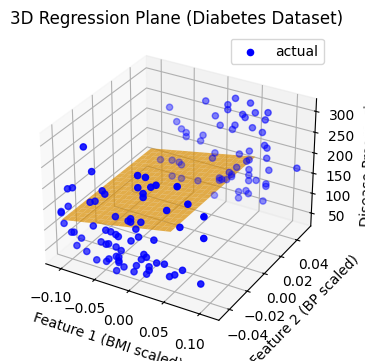

In [6]:
#diabetes dataset

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


diabetes=load_diabetes()
x=diabetes.data[:,:2]
y=diabetes.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

# Print model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(111,projection="3d")

ax.scatter(x_test[:,0],x_test[:,1],y_test,color="blue",label="actual")

x_surf,y_surf=np.meshgrid(
    np.linspace(x[:,0].min(),x[:,1].max(),20),
    np.linspace(x[:,1].min(),x[:,1].max(),20)
)
z_surf=model.intercept_+model.coef_[0]*x_surf+model.coef_[1]*y_surf

ax.plot_surface(x_surf,y_surf,z_surf,alpha=0.7,color="orange")

ax.set_xlabel("Feature 1 (BMI scaled)")   # optional: label features correctly
ax.set_ylabel("Feature 2 (BP scaled)")
ax.set_zlabel("Disease Progression")
ax.set_title("3D Regression Plane (Diabetes Dataset)")

plt.legend()


C:\Users\ammus\AppData\Local\Temp\ipykernel_19160\4143788060.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['employee']=le.fit_transform(x['employee'])
C:\Users\ammus\AppData\Local\Temp\ipykernel_19160\4143788060.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['edu_level']=le.fit_transform(x['edu_level'])


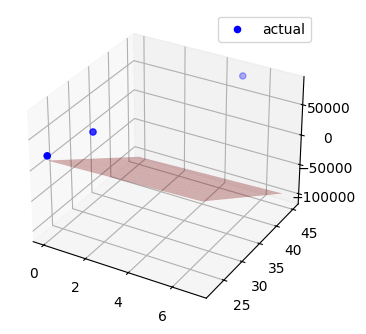

In [10]:
# another ques

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_csv("sample5.csv")

x=df[['employee','age','experience','edu_level']]
y=df.iloc[:,-1]

le=LabelEncoder()
x['employee']=le.fit_transform(x['employee'])
x['edu_level']=le.fit_transform(x['edu_level'])

# Convert to numpy for slicing
x=x.values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111,projection="3d")

x_surf,y_surf=np.meshgrid(
    np.linspace(x[:,0].min(),x[:,0].max(),20),
    np.linspace(x[:,1].min(),x[:,1].max(),20)
)

z_surf=model.intercept_+model.coef_[0]*x_surf+model.coef_[1]*y_surf

ax.scatter(x_test[:,0],x_test[:,1],y_test,color="blue",label="actual")
ax.plot_surface(x_surf,y_surf,z_surf,alpha=0.3,color="red")

plt.legend()